<h1>Project 1 on Machine Learning, deadline October 7 (midnight), 2024</h1>

<h2>Franke function</h2>

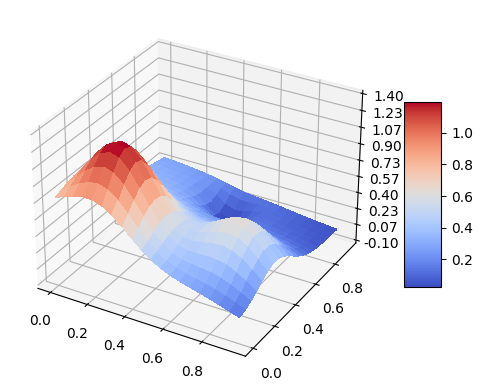

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<h2>Part a) : Ordinary Least Square (OLS) on the Franke function</h2>

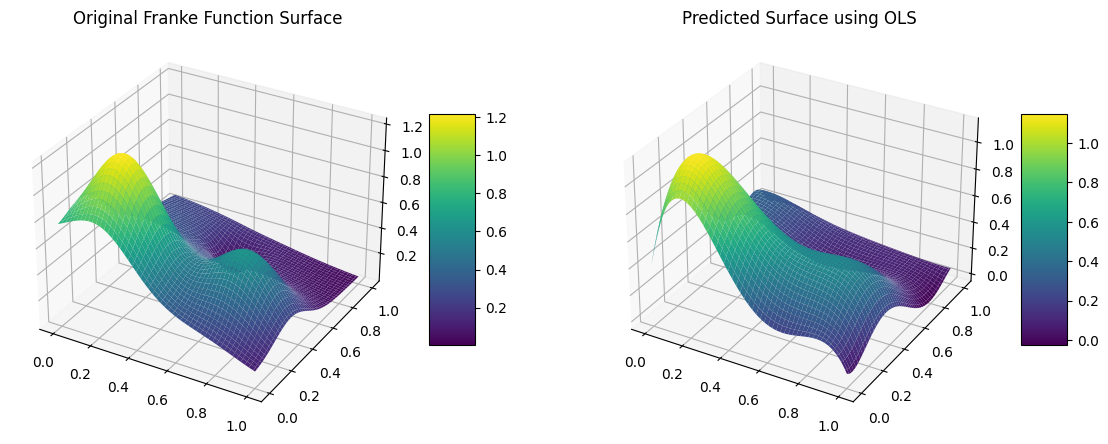

5 degree polynomial model
MSE: 0.0023
R2: 0.9734


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


np.random.seed(0)

# Generate data.
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
xm, ym = np.meshgrid(x,y)

def FrankeFunction(x, y, noisefactor=0.0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + noisefactor*np.random.randn(x.shape[0], y.shape[1])

z = FrankeFunction(xm, ym)

x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()

#create a 5 degree poylnomial model for plotting
degree = 5
def create_design_matrix(x, y, degree):
    polydegs = sum(i for i in range(1, degree + 2)) # Number of combinations in polynomial
    beta_ticks = np.zeros(polydegs,dtype=object)

    X = np.ones((len(x), polydegs))
    column = 0
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            # Create design matrix with columns 1, x, y, x^2, xy, y^2, x^3, x^2y, xy^2, y^3, ...
            input = (x**i * y**j)
            X[:,column] = input

            # Create beta ticks only for plotting purposes
            if i== 0 and j == 0:
                string = r"$1$"
            elif i == 0 and j != 0:
                string = r"$y^{j}$".format(j=j)
            elif i != 0 and j == 0:
                string = r"$x^{i}$".format(i=i) 
            else:
                string = r"$x^{i}y^{j}$".format(i=i, j=j)
            beta_ticks[column] = string


            column += 1
    return X, beta_ticks

X,beta_ticks = create_design_matrix(x_flat, y_flat, degree)

#Scaling the data
Xmean = np.mean(X, axis=0)
X[:,1:] = X[:,1:] - Xmean[1:]
zmean = np.mean(z_flat)
z_flat = z_flat - zmean

# Split the data
X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=42)


# OLS regression
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train


z_tilde = X_train @ beta
z_pred = X_test @ beta
z_model = X @ beta

# Reshape for plotting
z_model = z_model.reshape(xm.shape)

#Undo scaling for visualization
z_model = z_model + zmean

fig = plt.figure(figsize=(14, 6))
# Original surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(xm, ym, z, cmap='viridis')
ax1.set_title("Original Franke Function Surface")
fig.colorbar(surf1, shrink=0.5, aspect=5)

# Predicted surface
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xm, ym, z_model, cmap='viridis')
ax2.set_title("Predicted Surface using OLS")
fig.colorbar(surf2, shrink=0.5, aspect=5)
plt.show()

# MSE and R2 score
mse = mean_squared_error(z_test, z_pred)
r2 = r2_score(z_test, z_pred)
print('5 degree polynomial model')
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")




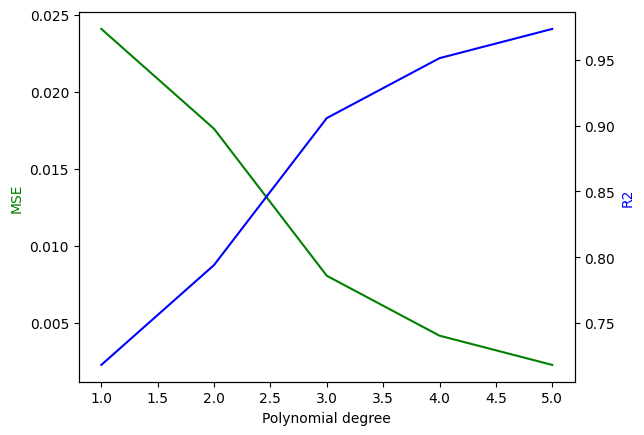

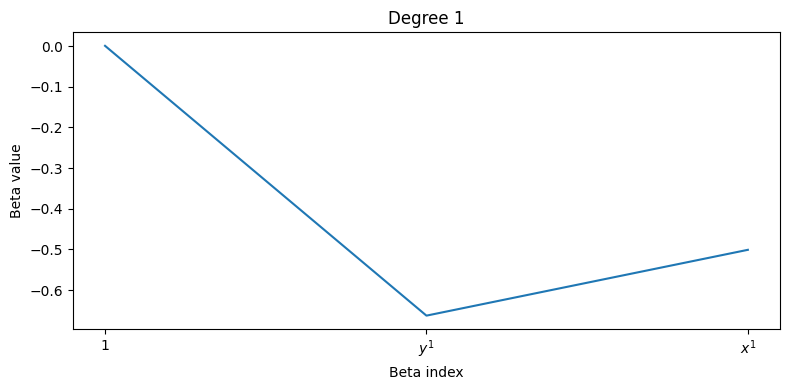

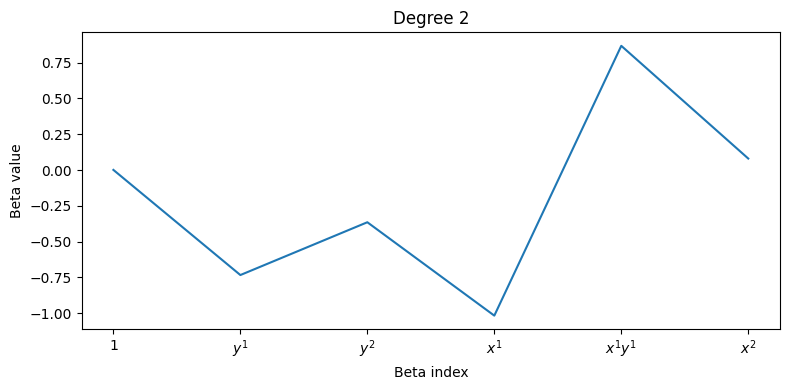

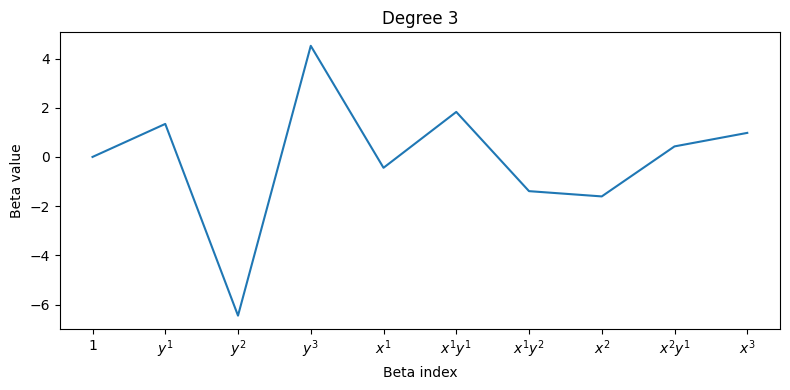

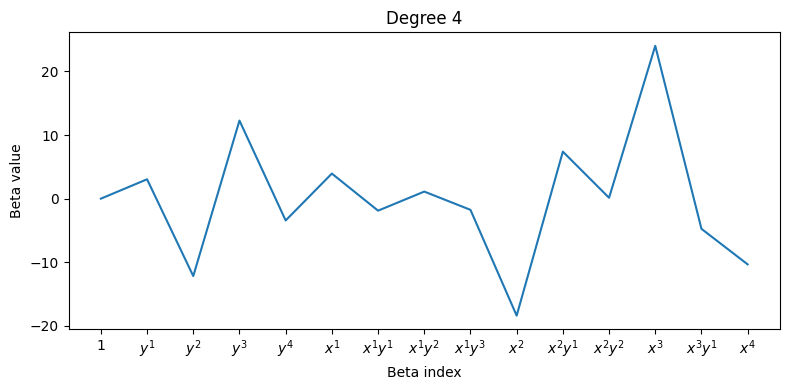

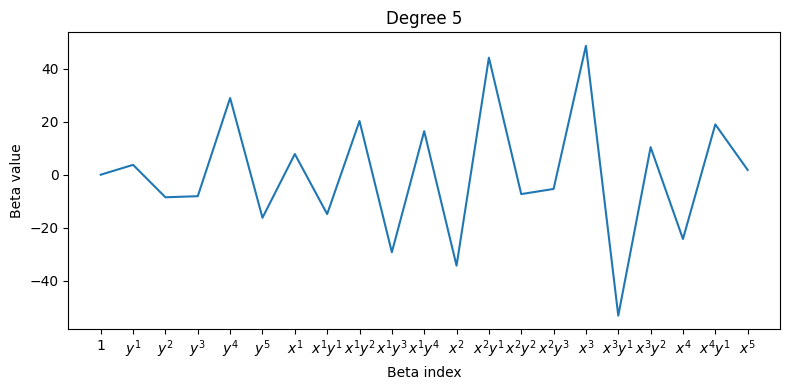

In [11]:
#Calculate and plot MSE and R2 score as a function of the polynomial degree, Also plot the beta values

degrees = np.arange(1, 6)
mse = []
r2 = []
beta_values = []
beta_ticks_list = []

for d in degrees:
    # Create design matrix for each degree
    X,beta_ticks = create_design_matrix(x_flat, y_flat, d)

    #Scaling the data (No need to unscale because we are only interested in the beta values, and accuracy)
    Xmean = np.mean(X, axis=0)
    X[:,1:] = X[:,1:] - Xmean[1:]
    zmean = np.mean(z_flat)
    z_flat = z_flat - zmean


    X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=42)
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    z_pred = X_test @ beta

    mse.append(mean_squared_error(z_test, z_pred))

    r2.append(r2_score(z_test, z_pred))

    beta_values.append(beta)

    beta_ticks_list.append(beta_ticks)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(degrees, mse, 'g-')
ax2.plot(degrees, r2, 'b-')
ax1.set_xlabel('Polynomial degree')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
plt.show()



for i in range(d):
    fig = plt.figure(figsize=(8, 4))
    plt.plot(beta_values[i])
    plt.title(f"Degree {i+1}")

    plt.xticks(ticks=np.arange(len(beta_ticks_list[i])), labels=beta_ticks_list[i])
    plt.xlabel('Beta index')
    plt.ylabel('Beta value')
    plt.tight_layout()
    plt.show()


<h2>Part b): Adding Ridge regression for the Franke function
</h2>